<a href="https://colab.research.google.com/github/Ishmeet7/Data-Science/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 0:Reading the data

In [ ]:
import pandas as pd                      #importing libraries
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.tsa.stattools as sma
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.model_selection import train_test_split
from math import sqrt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [ ]:
given_data=pd.read_excel(r"DS_Data.xlsx") #reading given data

In [ ]:
attributes_list=given_data.columns
print("Column names are: ",attributes_list)

Column names are:  Index(['Year', 'Month', 'Laptop/Desktop', 'Type_of_Customers?', 'Coming from',
       'Place_in_India', 'Level 1', 'Level 2', 'Level 3', 'Level 4'],
      dtype='object')


In [ ]:
given_data.dtypes  #data names in each column

Year                    int64
Month                  object
Laptop/Desktop         object
Type_of_Customers?     object
Coming from            object
Place_in_India         object
Level 1               float64
Level 2               float64
Level 3                 int64
Level 4                 int64
dtype: object

In [ ]:
print("The page was accessed from following cities :",given_data['Place_in_India'].unique())

The page was accessed from following cities : ['Bengaluru' 'Hyderabad' 'Dehradun' 'Indore' 'Pune']


In [ ]:
print("Columns with missing values are :",given_data.columns[given_data.isna().any()])

Columns with missing values are : Index(['Level 1', 'Level 2'], dtype='object')


***Answers**

▪	What type of company this dataset belongs to? **

I think this dataset belongs to sales of E commerce company .

In [ ]:
Group1=given_data.groupby(["Place_in_India",'Type_of_Customers?',"Coming from"])

In [ ]:
print("number of new customers From Pune that came from Linkedin are :",Group1.get_group(("Pune","New_Customer","Came_From_LinkedIn")).size)


number of new customers From Pune that came from Linkedin are : 720


#### Exploring data

In [ ]:
for attribute in attributes_list:
    print("Unique values in ",attribute,":",given_data[attribute].unique())

Unique values in  Year : [2020 2021 2022]
Unique values in  Month : ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Unique values in  Laptop/Desktop : ['Desktop_Website' 'Laptop_Website']
Unique values in  Type_of_Customers? : ['Existing_Customer' 'New_Customer']
Unique values in  Coming from : ['Came_From_LinkedIn' 'Landed_Directly' 'Unidentified_Sources']
Unique values in  Place_in_India : ['Bengaluru' 'Hyderabad' 'Dehradun' 'Indore' 'Pune']
Unique values in  Level 1 : [    nan 109234. 112869. ...  48713. 593021. 372897.]
Unique values in  Level 2 : [    nan  98100.  91801. ...  27770. 310836. 123057.]
Unique values in  Level 3 : [ 56892  41460  55561 ...   7515 161575  48802]
Unique values in  Level 4 : [17178 11916 19461 ...  2089 78465 19441]


## Part 1:Data Cleaning

In [ ]:
def data_cleaning(dataframe):
    L1=dataframe["Level 1"]
    L4=dataframe["Level 4"]
    growth_or_reduction_percentage =((L1-L4)/L1)*100  #adding the growth/reduction percentage column
    dataframe["inc/dec percentage"]=growth_or_reduction_percentage 
    dataframe.fillna(value=dataframe.mean(axis=0),inplace=True) #filling missing values with mean of column
    dataframe.apply(lambda x:x.replace({"Jan":'January',"Feb":"February","Mar":"March","Apr":"April","Jun":"June","Jul":"July","Aug":"August","Sep":"September","Oct":"October","Nov":"November","Dec":"December"},inplace=True))
    dataframe.apply(lambda x:x.replace({"Came_From_LinkedIn":"From LinkedIn","Landed_Directly":"Direct_traffic" },inplace=True)) #Changing value of attribute as directed
    return dataframe

In [ ]:
data_cleaning(given_data)

<ipython-input-795-24c13a1d5ad2>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataframe.fillna(value=dataframe.mean(axis=0),inplace=True) #filling missing values with mean of column


,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4,inc/dec percentage
0,2020,January,Desktop_Website,Existing_Customer,From LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178,85.886489
1,2020,January,Desktop_Website,Existing_Customer,From LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916,85.886489
2,2020,January,Desktop_Website,Existing_Customer,From LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461,85.886489
3,2020,January,Desktop_Website,Existing_Customer,From LinkedIn,Indore,783870.222017,358215.416281,320923,110667,85.886489
4,2020,January,Desktop_Website,Existing_Customer,From LinkedIn,Pune,783870.222017,358215.416281,220937,46033,85.886489
...,...,...,...,...,...,...,...,...,...,...,...
2155,2022,December,Laptop_Website,New_Customer,Unidentified_Sources,Bengaluru,67299.000000,21255.000000,6984,1882,97.203525
2156,2022,December,Laptop_Website,New_Customer,Unidentified_Sources,Hyderabad,430294.000000,156510.000000,46676,16703,96.118235
2157,2022,December,Laptop_Website,New_Customer,Unidentified_Sources,Dehradun,48713.000000,27770.000000,7515,2089,95.711617
2158,2022,December,Laptop_Website,New_Customer,Unidentified_Sources,Indore,593021.000000,310836.000000,161575,78465,86.768597


## Part 2:Descriptive Statistics

In [ ]:
def descriptive_stats(dataframe):
    cols=["Level 1",'Level 2','Level 3','Level 4']
    print("1) Minimum value present in columns: ","\n",dataframe[cols].min())
    print("-----")
    grp1=dataframe.groupby(['Laptop/Desktop',"Coming from"])
    g=grp1.get_group(("Desktop_Website","Direct_traffic"))

    g["Level 2/Level 1"]=g["Level 2"]/g["Level 1"]
    print("2) Maximum value of Level 2/Level 1 among those who came directly to the via desktop website is :",g["Level 2/Level 1"].max())
    print("------")
    df=dataframe.fillna({"Year":"2020","Month":'January'}) #standard way for filling missing values with given parameter
    median1=dataframe["Level 1"].median()               # But as there are missing values only in Level 1 and Level 2 column
    median2=dataframe["Level 2"].median()                #used median for filling values as data is skewed
    df=dataframe.fillna({"Level 1":median1,"Level 2":median2})
    print("3) Summary statistics ","\n",df.describe(include='all').T) 
    print("------") #4.	Generates the summary statistics 
    col1=['Month', 'Laptop/Desktop', 'Type_of_Customers?', 'Coming from','Place_in_India'] #non numeric columns
    for attribute in col1:                             #unique values & data types present in the non-numeric columns in df
         print(" Unique values in non numeric columns in df :","\n",attribute,df[attribute].unique())
    print("------")
    print("data types of non numeric columns in df", df[col1].dtypes) 
    

In [ ]:
descriptive_stats(given_data)

1) Minimum value present in columns:  
 Level 1    24567.0
Level 2     8425.0
Level 3     3761.0
Level 4      766.0
dtype: float64
-----
2) Maximum value of Level 2/Level 1 among those who came directly to the via desktop website is : 0.7938173377045838
------
3) Summary statistics  
                      count unique                top  freq           mean  \
Year                2160.0    NaN                NaN   NaN         2021.0   
Month                 2160     12            January   180            NaN   
Laptop/Desktop        2160      2    Desktop_Website  1080            NaN   
Type_of_Customers?    2160      2  Existing_Customer  1080            NaN   
Coming from           2160      3      From LinkedIn   720            NaN   
Place_in_India        2160      5          Bengaluru   432            NaN   
Level 1             2160.0    NaN                NaN   NaN  783870.222017   
Level 2             2160.0    NaN                NaN   NaN  358215.416281   
Level 3             2

<ipython-input-797-1e6984abe061>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g["Level 2/Level 1"]=g["Level 2"]/g["Level 1"]


## Part3:Prescriptive Statistics

In [ ]:
sum1=given_data.groupby(['Year',"Place_in_India"])['Level 4'].sum() #finding sum of Level 1 in a particular city in each year

In [ ]:
given_data["Rank by column Level 4"]=given_data.groupby(['Year'])['Level 4'].rank(ascending=False) #Assigning rank to each value of level 4 yearwise

In [ ]:
GROUP=given_data.groupby(['Year'])['Level 4'].nlargest(3) #grouping data by year and finding 3 largest value in each year
GROUP=pd.merge(GROUP,given_data,on='Level 4',how='inner') #merging groupby object and original dataframe to get all columns

In [ ]:
required=GROUP[["Year","Place_in_India","Rank by column Level 4","Level 4"]] #taking only required columns from dataframe

In [ ]:
required1=pd.merge(sum1,required,on=["Year","Place_in_India"],how="right") #merging sum column
required1.rename(columns={"Level 4_x":"Sum of Level 4","Level 4_y":"Level 4"},inplace=True) #renaming columns

In [ ]:
required1 #top 3 “Place_in_India”  on the basis of column “Level 4 yearwise”

,Year,Place_in_India,Sum of Level 4,Rank by column Level 4,Level 4
0,2020,Indore,20092071,1.0,1251258
1,2020,Dehradun,3685750,2.0,873534
2,2020,Indore,20092071,3.0,446361
3,2021,Pune,12805835,1.0,558073
4,2021,Indore,17533698,2.0,447909
5,2021,Pune,12805835,3.0,400768
6,2022,Pune,11208722,1.0,923720
7,2022,Pune,11208722,2.0,781617
8,2022,Bengaluru,3752706,3.0,502226


In [ ]:
new=given_data.groupby(["Place_in_India","Year"])["Level 1","Level 2","Level 3","Level 4"].sum() #calculating sum year wise and place wise for each level

<ipython-input-805-7dc708231470>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new=given_data.groupby(["Place_in_India","Year"])["Level 1","Level 2","Level 3","Level 4"].sum() #calculating sum year wise and place wise for each level


In [ ]:
l21=new["Level 2"]/new["Level 1"] #Calculating Level2/Level1 and so on.
l31=new["Level 3"]/new["Level 1"]
l41=new["Level 4"]/new["Level 1"]
new["Sum of Level 2/Sum of Level 1"]=l21 #adding new columns to dataframe
new["Sum of Level 3/Sum of Level 1"]=l31
new["Sum of Level 4/Sum of Level 1"]=l41

In [ ]:
new.groupby("Year")["Sum of Level 4/Sum of Level 1"].nsmallest(3) #bottom 3 “Place_in_India”  on the basis of column “Level 4”/ “Level 1” yearwise

Year  Place_in_India  Year
2020  Bengaluru       2020    0.046336
      Dehradun        2020    0.049106
      Hyderabad       2020    0.065812
2021  Dehradun        2021    0.031764
      Bengaluru       2021    0.042744
      Pune            2021    0.069406
2022  Dehradun        2022    0.033521
      Bengaluru       2022    0.048503
      Pune            2022    0.059378
Name: Sum of Level 4/Sum of Level 1, dtype: float64

In [ ]:
given_data[given_data["Level 4"]>150000].groupby("Place_in_India").size()
#Indore is having “Level 4” value greater than 150000 most of the times

Place_in_India
Bengaluru      6
Dehradun       2
Hyderabad     14
Indore       143
Pune          71
dtype: int64

In [ ]:
g=given_data[["Place_in_India","Type_of_Customers?"]].groupby(["Place_in_India","Type_of_Customers?"])


In [ ]:
print(g.size())

Place_in_India  Type_of_Customers?
Bengaluru       Existing_Customer     216
                New_Customer          216
Dehradun        Existing_Customer     216
                New_Customer          216
Hyderabad       Existing_Customer     216
                New_Customer          216
Indore          Existing_Customer     216
                New_Customer          216
Pune            Existing_Customer     216
                New_Customer          216
dtype: int64


## Part 4:Visualisation

In [ ]:
def plot_graph(arg1,arg2,year1,year2,x,y):
    df1=given_data[["Year",arg1,arg2,"Month"]]
    df1=df1[np.logical_or(df1["Year"]==year1,df1["Year"]==year2)] #taking data for asked years
    df1["Date"]=df1['Month']+"-"+df1['Year'].map(str)
     #creating date column
    Xlabel=df1["Date"].unique() #list of Unique dates
    Xlab=Xlabel.tolist()#labels on x axis
    df1.groupby(arg1)[arg2].plot(figsize=(20,7))  #grouping as per requirement and then plotting
    
    ls=np.linspace(x,y,24) #creating x ticks
    plt.xticks(ls,labels=Xlab,rotation=60)
    plt.legend()
    plt.show()
    

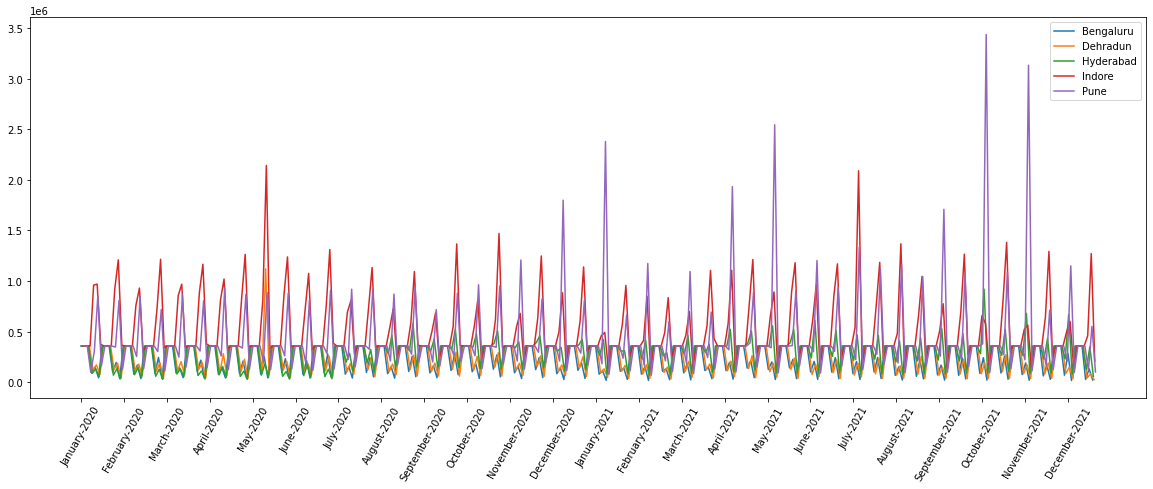

In [ ]:
plot_graph("Place_in_India","Level 2",2020,2021,0,1400) #A line graph for “Level 2” for the different “Place_in_India?” over the months of the year 2020 & 2021.


Insight 1:
- The level 2 is constantly low for the cities Dehradun and Hyderbad (No Trend, but elemnt of seasonality is present).
- The city of Pune has a spike corresponding to Level 2 during the year 2021, particularly during the holiday season(October-November: Dusshera-Diwali Month,
summer vacations: April May).
- In the city of Indore across both the years 2020 and 2021 the pattern on level 2 is same. 


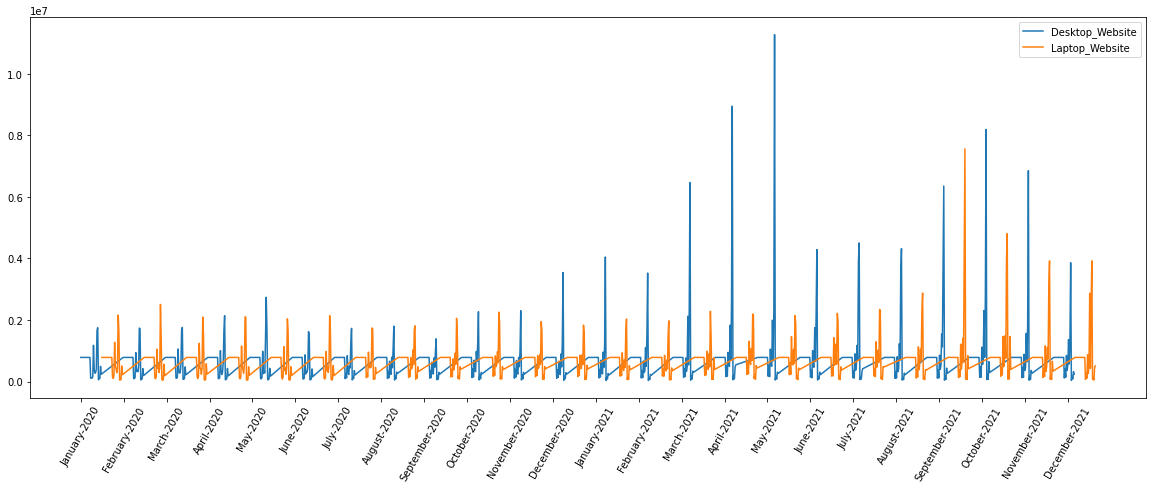

In [ ]:
plot_graph("Laptop/Desktop","Level 1",2020,2021,0,1400) #2.	A line graph for “Level 1” for the different “Laptop/Desktop” over the months of the year 2020 & 2021. 


- For both the Desktop_Website and Laptop_Website the number of users(Level 2 entities) appears to be left skewed with the mode>median>mean.
- The user acquisition pattern (Level2 pattern) is multimodal for Desktop_Website.
- The user acquisition magnitude for Desktop_Website is always greater than that of laptop_Website.

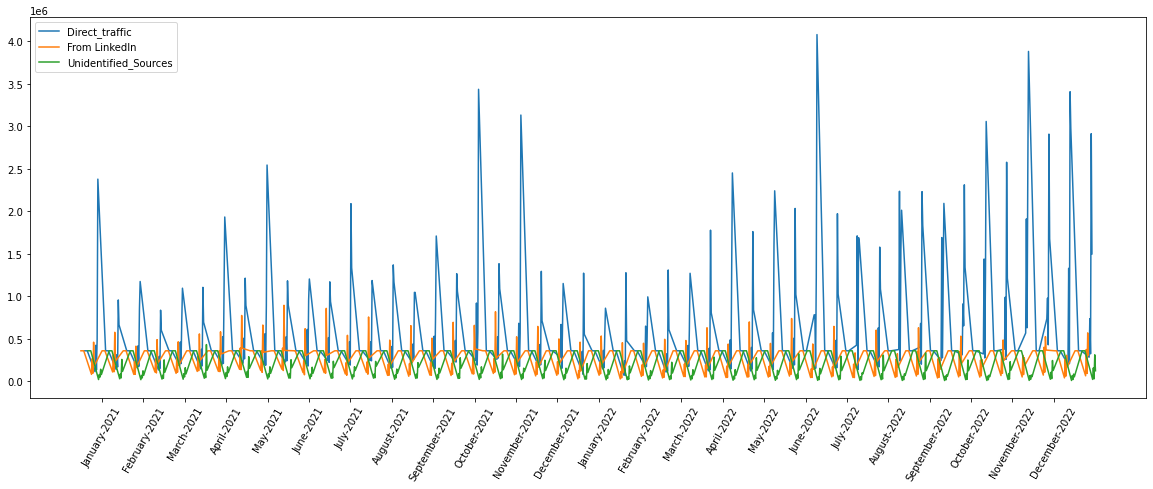

In [ ]:
plot_graph("Coming from","Level 2",2021,2022,750,2100) #graph for “Level 2” for the different “Coming from” over the months of the year 2021 & 2022.


- The user acquisition(Level2) from direct_traffic from website was the highest and it was considerably more than that from the unidentified_sources.

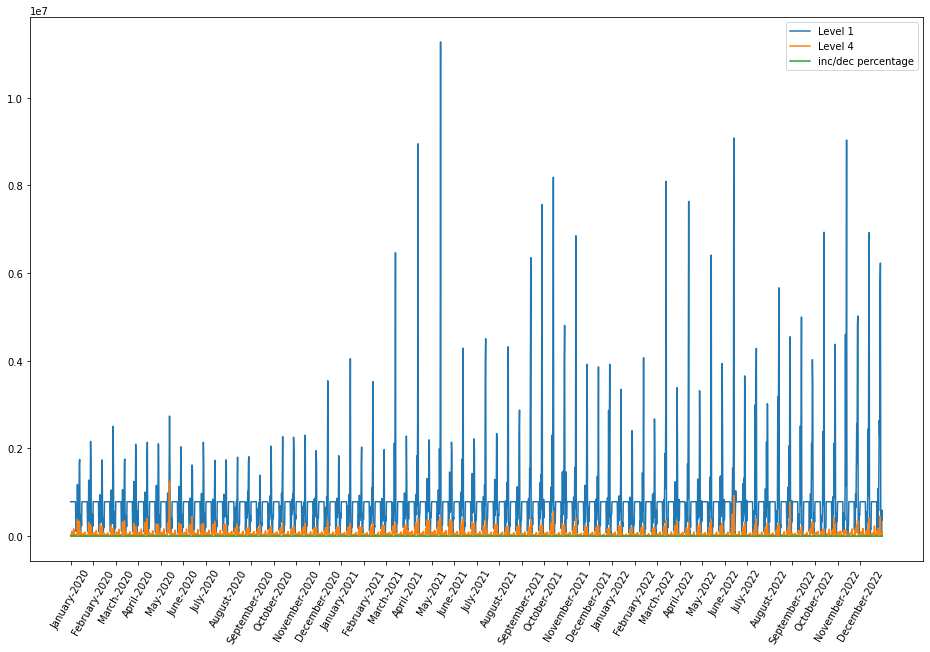

In [ ]:
given_data.drop("Date",axis=1,inplace=True) #4.	A line graph for “Level 1”, “Level 4”  and “inc/dec percentage” columns over the months of the year 2020, 2021 & 2022
given_data["Date"]=given_data['Month']+"-"+given_data['Year'].map(str)
L1=given_data["Level 1"]                                                    
L4=given_data["Level 4"]
df5=given_data[["Level 1","Level 4","inc/dec percentage","Date"]]
g=df5.groupby("Date")

df5.plot(figsize=(16,10))
ls=np.linspace(0,2100,36)
Xlabel=given_data["Date"].unique()
Xlab=Xlabel.tolist()
plt.xticks(ls,labels=Xlab,rotation=60)
plt.legend()
plt.show()

- For all the months across the three years of 2020, 2021 and 2022 the magnitude is always greater for Level1 and is less in Level4.

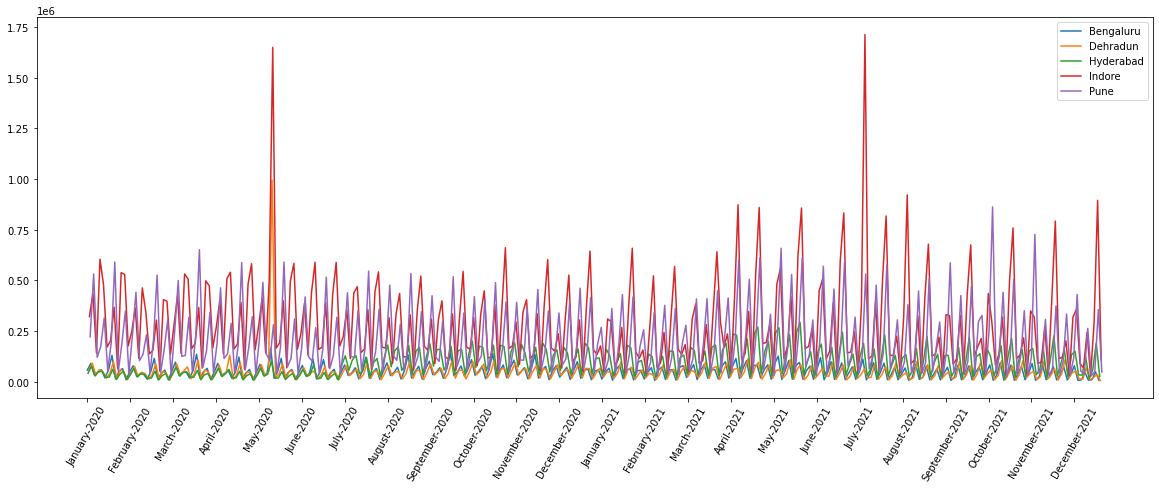

In [ ]:
plot_graph("Place_in_India","Level 3",2020,2021,0,1400) #graph for “Level 3” and “Place_in_India” over the months of the year 2020 and 2021.

For the Level-3 the spikes are highest for the city Indore corresponding to the months of May-2020 and July-2021 and is nearly constant for the rest of the timeline. For the cities of Hyderabd and Dehradun the Level 3 is constantly low, also for the city of Pune the Level 3 is constantly in the medium magnitudial range. 

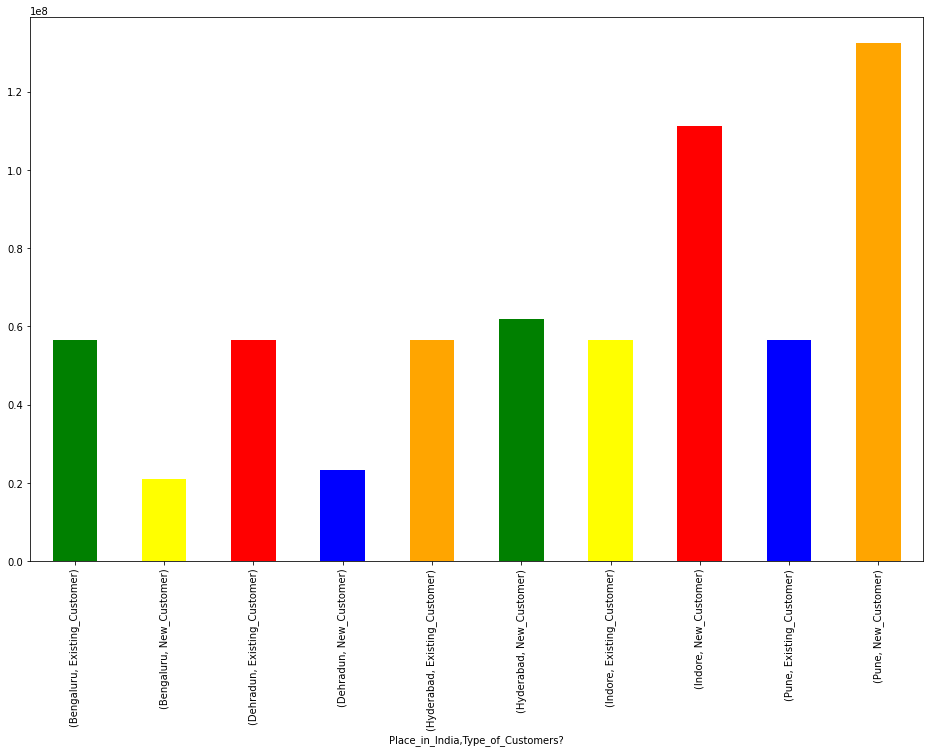

In [ ]:
df8=given_data[given_data["Year"]==2022]         #bar graph showing the “Level 1” from various places in India , also, representing the type of customers, for the year 2022
df7=df8[["Place_in_India","Level 1","Type_of_Customers?"]]

f=df7.groupby(["Place_in_India","Type_of_Customers?"])["Level 1"].sum()
f.plot.bar(figsize=(16,10),color=["green","yellow","red","blue","orange"])

-All the NA values in column "Level 1" were replaced by median .The existing customers in all the cities in year 2022 had "Level 1" value as NA.because of replacing values with median .All of them show same value for "Existing customers"
-Pune had maximum value of Level1 for new customers in year 2022 followed by Indore